In [41]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [42]:
df = pd.read_excel(r"C:\Users\KIIT\Downloads\Global Superstore.xlsx")


furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [43]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date        0
Market            0
Sales             0
Shipping Cost     0
Order Priority    0
dtype: int64

In [44]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [45]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2011-01-01', '2011-01-03', '2011-01-04', '2011-01-05',
               '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-10',
               '2011-01-11', '2011-01-12',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1333, freq=None)

In [46]:
y = furniture['Sales'].resample('MS').sum()

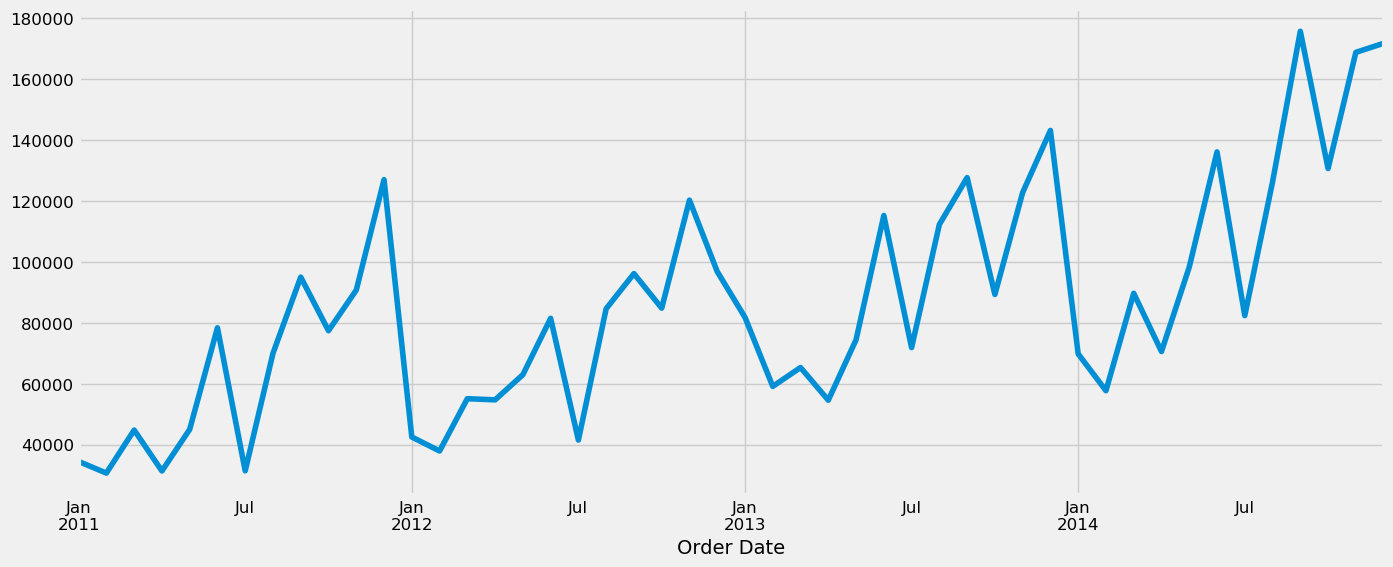

In [47]:
y.plot(figsize=(15, 6))
plt.show()

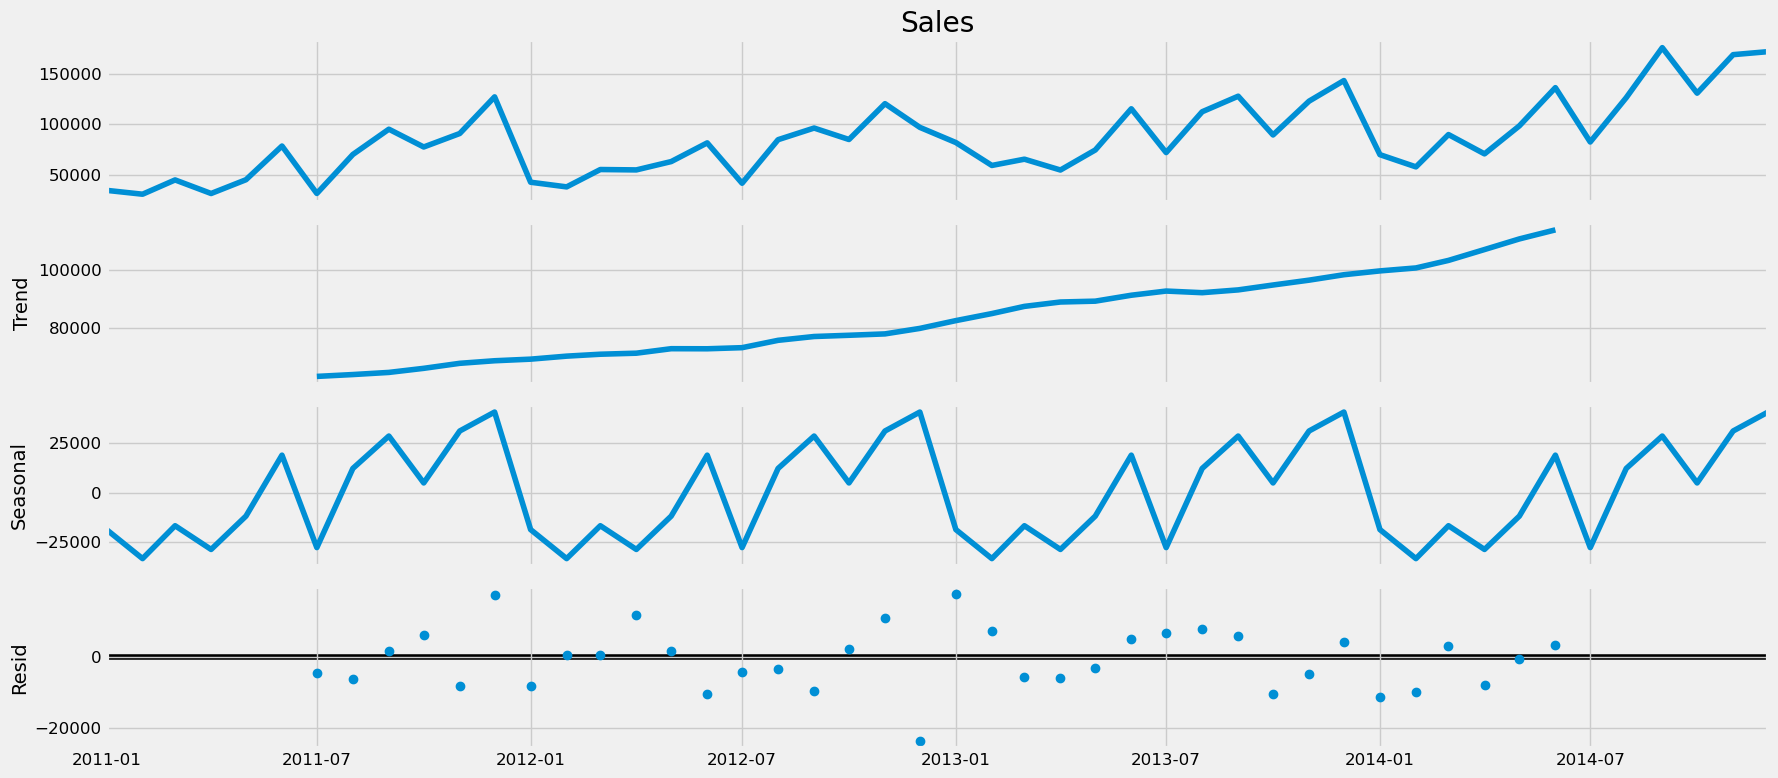

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [49]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                y,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC: {}'.format(param, param_seasonal, results.aic))

        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC: 1212.150494320523
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC: 62255.884277515834
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC: 808.3719888935642
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC: 550.0326330710137
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC: 808.3473645173283
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC: 1163.9377968822835
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC: 558.8195644706309
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC: 517.4241486105699
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC: 1161.1329995655744
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC: 58372.64704060464
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC: 782.0526361349372
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC: 508.07594657215236
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC: 899.5069401681461
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC: 55677.88474019317
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC: 548.5497334611485
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC: 507.8345658980691
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC: 1090.450823845118
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC: 1278.3

In [51]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1965      0.657      0.299      0.765      -1.091       1.484
ma.L1         -0.5689      0.560     -1.017      0.309      -1.666       0.528
ar.S.L12      -0.5952      0.163     -3.651      0.000      -0.915      -0.276
sigma2      1.719e+08   3.39e-09   5.07e+16      0.000    1.72e+08    1.72e+08


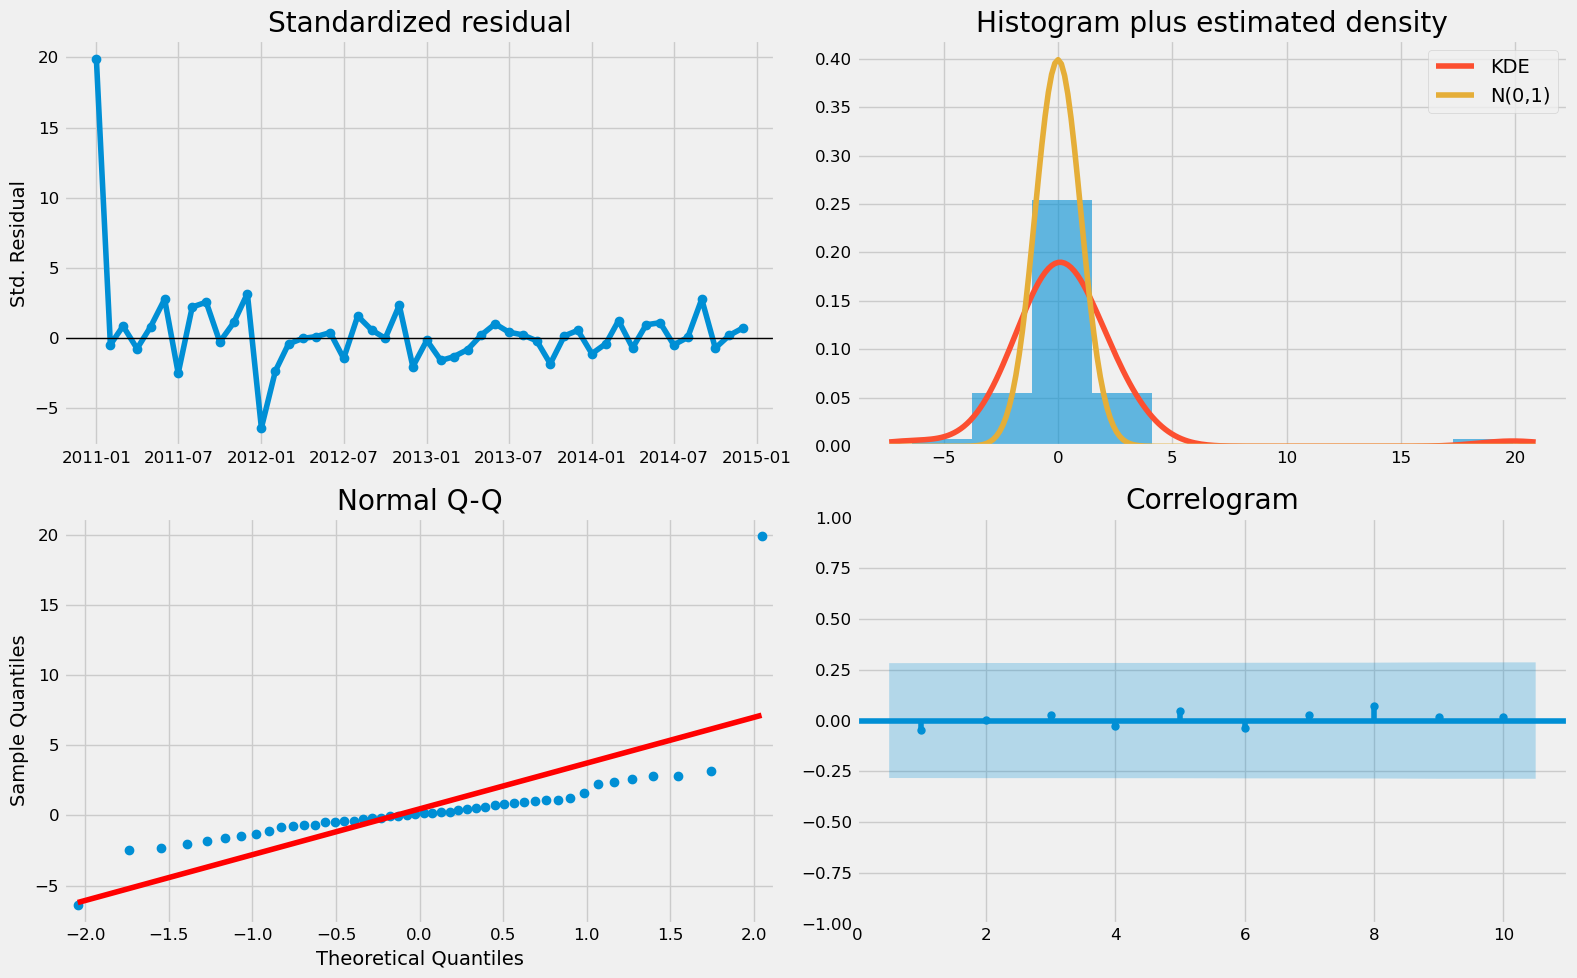

In [52]:

sfe = getattr(results.filter_results, "standardized_forecasts_error", None)
if sfe is not None:
  
    try:
        vals = np.asarray(sfe[0]).ravel()
        vals = vals[~np.isnan(vals)]
    except Exception:
        vals = None
else:
    vals = None

if vals is None or len(vals) == 0:
    res = getattr(results, "resid", None)
    if res is None:
        raise RuntimeError("No residuals available from model to plot diagnostics.")
    vals = np.asarray(res.dropna())


usable_len = len(vals)
safe_lags = max(1, min(10, usable_len - 1))


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
ax1, ax2, ax3, ax4 = axes.ravel()


res_index = getattr(results, "resid").index if getattr(results, "resid", None) is not None else np.arange(usable_len)
ax1.plot(res_index[:usable_len], vals, marker='o', linestyle='-')
ax1.axhline(0, color='k', linewidth=1)
ax1.set_title("Standardized residual")
ax1.set_xlabel("")
ax1.set_ylabel("Std. Residual")


ax2.hist(vals, bins=10, density=True, alpha=0.6)
try:
    kde = gaussian_kde(vals)
    xgrid = np.linspace(vals.min() - 1, vals.max() + 1, 200)
    ax2.plot(xgrid, kde(xgrid), label='KDE')
except Exception:
    pass
xnorm = np.linspace(vals.min() - 1, vals.max() + 1, 200)
ax2.plot(xnorm, norm.pdf(xnorm, 0, 1), label='N(0,1)')
ax2.set_title("Histogram plus estimated density")
ax2.legend()


qqplot(vals, line='s', ax=ax3)
ax3.set_title("Normal Q-Q")


plot_acf(vals, lags=safe_lags, ax=ax4, zero=False)
ax4.set_title("Correlogram")

plt.tight_layout()
plt.show()


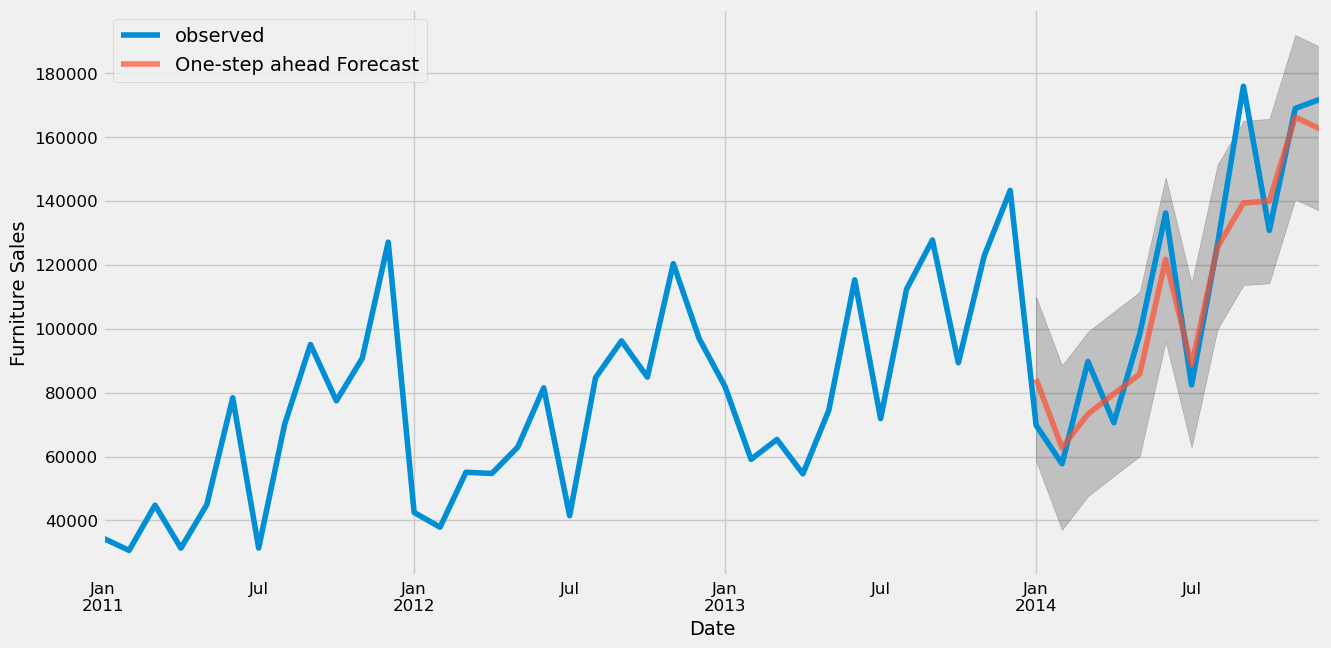

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [54]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 208773864.27


In [55]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 14449.01


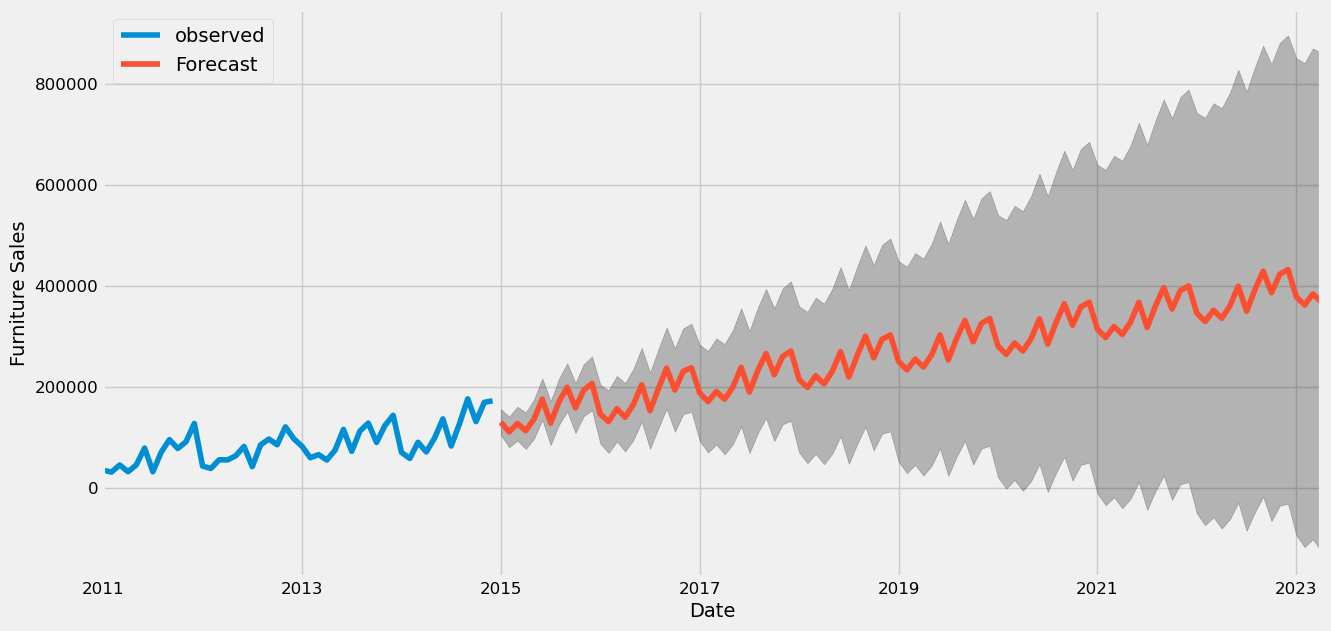

In [56]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()



In [58]:
import joblib


joblib.dump(results, "sarimax_furniture_model.pkl")

print("Model Saved Successfully!")


Model Saved Successfully!
